# Assignment 9 | Convolutional Neural Network

By **Pernille Lorup & Stephan Djurhuus**  
Institute **CPHBusieness**  

Education **Software Development**  
Elective **Artificial Intelligence**  
Topic **Neural Networks & Deep Learning**

## Content
_only works in jupyter notebooks_
* [The Theroy](#)
* [The Source](#)
    * [Environment | Imports](#)
    * [Environment | Configuration](#)
    * [Environment | Utillity Functions](#)
    * [Data | Preparation](#)
    * [Model | Configuration](#)
    * [Model | Training](#)
    * [Model | History](#)
    * [Model | Save & Load](#)
    * [Model | Analysis](#)
    * [Model | Testing](#)
    * [Model | Prediction](#)

___
## The Theory

### General | Activation
...

[reference, ](#)

### General | Confusion Matrix
...

[reference, ](#)

### General | Kernals
...

[reference, ](#)

### Neural Network | Convolutional Neural Network
...

[reference, ](#)

### Layer | Convolutional
...

[reference, ](#)

### Layer | Max Pooling
...

[reference, ](#)



### Model | History
...

[reference, ](#)

___
## The Source
### Environment | Imports

In [1]:
import cv2                 # working with and resizing images
import os                  # dealing with directories
import numpy as np         # dealing with arrays and numbers
from random import shuffle # mixing up or currently ordered data
from tqdm import tqdm      # extra UX, shows progress bar

# tensorflow & keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# plotting itls
import seaborn as sns
from matplotlib import pyplot as plt

### Environment | Configuration

In [2]:
# tensorflow configuration
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

TRAIN_DIR = 'data-assets/train'
TEST_DIR = 'data-assets/test'
IMG_SIZE = 50

class_names = ['cat', 'dog']

### Environment | Utillity Functions

In [3]:
# function to get the image file name and create a label for it - one hot encoder
def set_label(file_name):
    label = file_name.split('.')[-3] 
    if label == 'cat': return 0
    elif label == 'dog': return 1

In [4]:
# prepare train data
def create_data(TRAIN_DIR):
    # empty array, which will contain the train images and their labels
    train_data = []
    
    # ...
    list_dir = os.listdir(TRAIN_DIR)

    # for each image file in the train directory:
    for file_name in tqdm(list_dir):
        # convert the file name into label by use of the function above
        label = set_label(file_name)
        
        # extend the file path for this image with the file name
        file_path = os.path.join(TRAIN_DIR, file_name)
        
        # alternativ
        # file_path = f'{TRAIN_DIR}/{file_name}'
        
        # read the image from this file
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        # img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
        
        # resize the image, so all have same size
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))       
        
        # add the image and its label into array 
        train_data.append([img, label])
        
    shuffle(train_data)
    np.save('models/train_data.npy', train_data)

    return (train_data[:-500], train_data[-500:])   

In [30]:
def plot_images(images, amount):
    plt.figure(figsize=(10,10))

    for i in range(amount):
        plt.subplot(5, 5, i+1)

        plt.xticks([])
        plt.yticks([])

        label = np.array(images[i][1])

        class_name = class_names[label]

        plt.xlabel(class_name)
        plt.imshow(images[i][0], cmap='gray')
    plt.show()

def plot_prediction(image, label_index):
    class_name = class_names[label_index]

    plt.xlabel(f'prediction {class_name}')
    plt.imshow(image, cmap='gray')
    plt.show()

def plot_test_result(image_data):
    label = image_data[1]
    class_name = class_names[label]

    plt.xlabel(class_name)
    plt.imshow(image_data[0], cmap='gray')
    plt.show()

### Data | Preparation

In [6]:
#train, test = create_data(TRAIN_DIR)

In [7]:
data = np.load('models/train_data.npy', allow_pickle=True)
train_data, test_data = data[:-500], data[-500:]

In [8]:
train_images = np.array([image_data[0] for image_data in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array([image_data[1] for image_data in train_data])

test_images = np.array([image_data[0] for image_data in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array([image_data[1] for image_data in test_data])

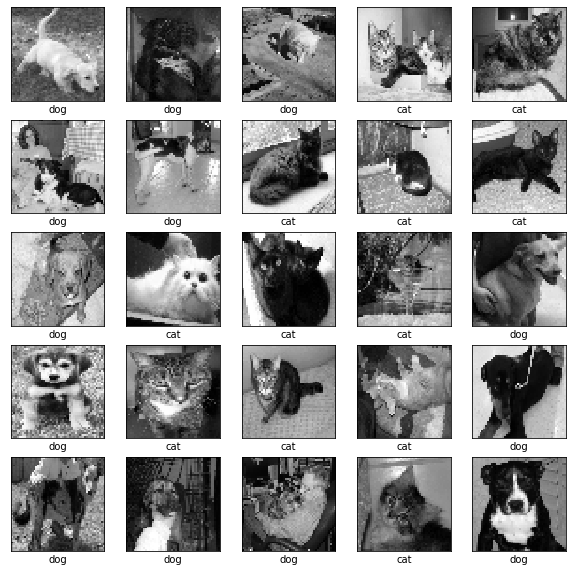

In [9]:
plot_images(train_data, 25)

### Model | Configuration

In [10]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [11]:
loss_func = SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])

### Model | Training

In [12]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 78s 3ms/sample - loss: 0.9016 - accuracy: 0.5426 - val_loss: 0.6766 - val_accuracy: 0.5560
Epoch 2/10
24500/24500 [==============================] - 73s 3ms/sample - loss: 0.6776 - accuracy: 0.5665 - val_loss: 0.6586 - val_accuracy: 0.5900
Epoch 3/10
24500/24500 [==============================] - 72s 3ms/sample - loss: 0.6566 - accuracy: 0.6071 - val_loss: 0.6234 - val_accuracy: 0.6620
Epoch 4/10
24500/24500 [==============================] - 78s 3ms/sample - loss: 0.6306 - accuracy: 0.6493 - val_loss: 0.6129 - val_accuracy: 0.6860
Epoch 5/10
24500/24500 [==============================] - 95s 4ms/sample - loss: 0.5590 - accuracy: 0.7138 - val_loss: 0.5522 - val_accuracy: 0.7180
Epoch 6/10
24500/24500 [==============================] - 75s 3ms/sample - loss: 0.4962 - accuracy: 0.7586 - val_loss: 0.4890 - val_accuracy: 0.7580
Epoch 7/10
24500/24500 [==============================] - 

### Model | History

500/1 - 0s - loss: 0.4474 - accuracy: 0.7860


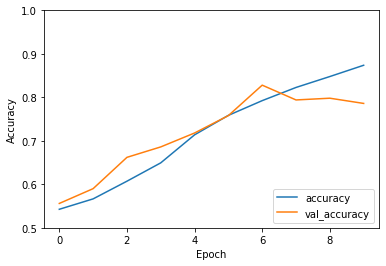

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### Model | Save & Load

In [14]:
# model.save('models/sequential_model.h5')
# model = tf.keras.models.load_model('models/sequential_model.h5')

### Model | Analysis

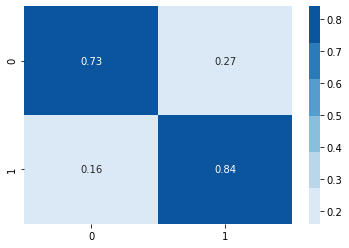

In [37]:
# ...
numpy_test_images = np.array(test_images, dtype='float32')
y_pred = model.predict_classes(numpy_test_images)
conf_matrix = tf.math.confusion_matrix(labels=test_labels, predictions=y_pred).numpy()

# displaying
conf_matrix = np.around([row/sum(row) for row in conf_matrix], decimals=2)
plot = sns.heatmap(conf_matrix, cmap=sns.color_palette("Blues"), annot=True)
figure = plot.get_figure()

### Model | Testing

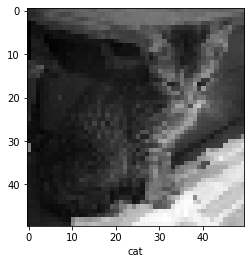

prediction cat


In [18]:
# ...
image_index = 100
image = np.array([test_images[image_index]], dtype='float32')

# ...
predictions = model.predict(image)
prediction = np.argmax(predictions)

# ...
image = test_data[image_index]
plot_test_result(image)
print('prediction', class_names[prediction])

### Model | Prediction

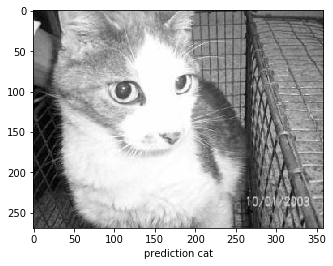

In [36]:
image_number = 785

# ...
file_path = f'data-assets/test/{image_number}.jpg'

# ...
image_raw = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image_raw, (IMG_SIZE,IMG_SIZE))

# ...
image = np.array([image_resized], dtype='float32').reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# ...
predictions = model.predict(image)
prediction = np.argmax(predictions)

# ...
plot_prediction(image_raw, prediction)